In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [251]:
df = pd.read_csv("bank-full.csv",delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [252]:
df.shape

(45211, 17)

# EDA

In [253]:
df.info()
#check for imputations, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [254]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [255]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.subplot(*args, **kwargs)>

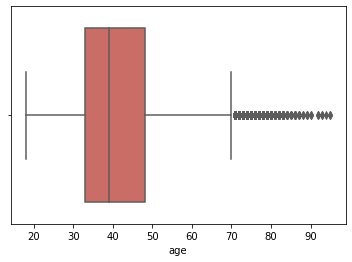

In [256]:
plt.figure(figsize=(6,4))
sns.boxplot(df['age'],palette="hls")
plt.subplot

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

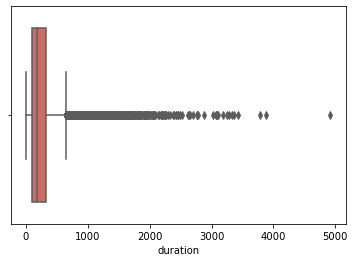

In [257]:
sns.boxplot(df['duration'],palette="hls")

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

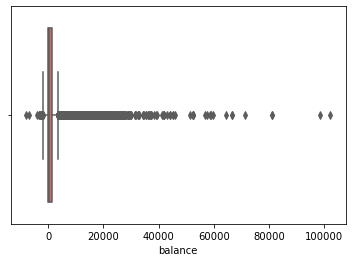

In [258]:
sns.boxplot(df['balance'],palette="hls")

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

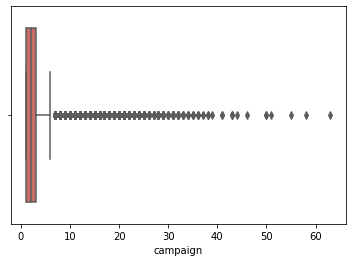

In [259]:
sns.boxplot(df['campaign'],palette="hls")

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

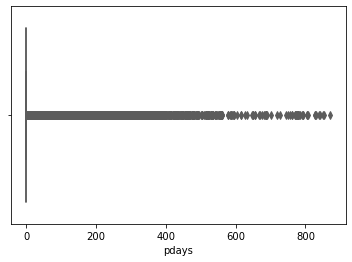

In [260]:
sns.boxplot(df['pdays'],palette="hls")

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

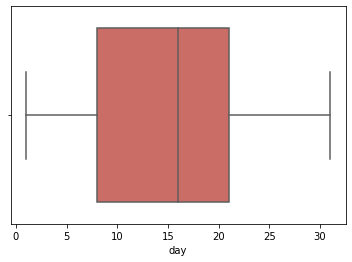

In [261]:
sns.boxplot(df['day'],palette="hls")

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous'>

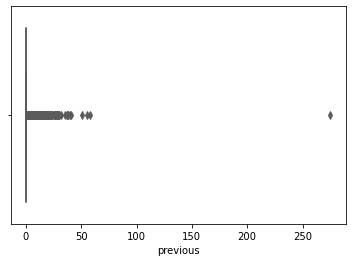

In [262]:
sns.boxplot(df['previous'],palette="hls")

In [263]:
# Getting the barplot for the categorical columns 

<AxesSubplot:xlabel='education'>

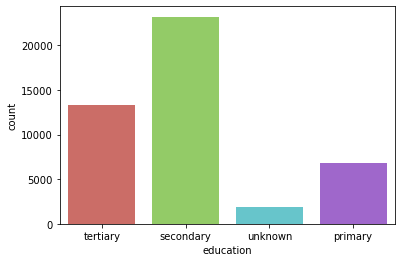

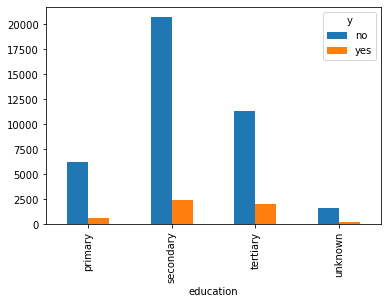

In [264]:
sns.countplot(x="education",data=df,palette="hls")
pd.crosstab(df.education,df.y).plot(kind="bar")

<AxesSubplot:xlabel='job'>

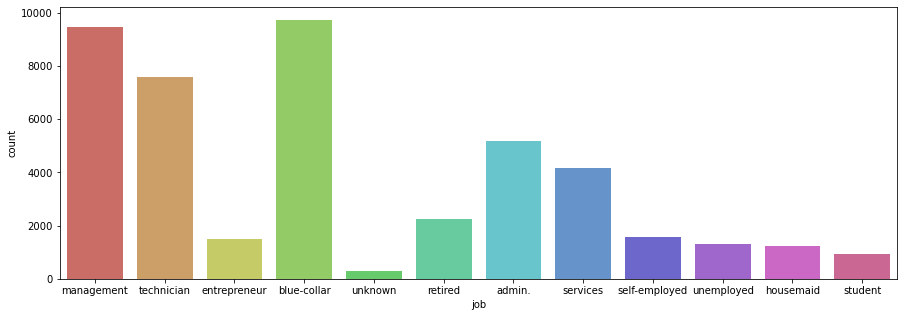

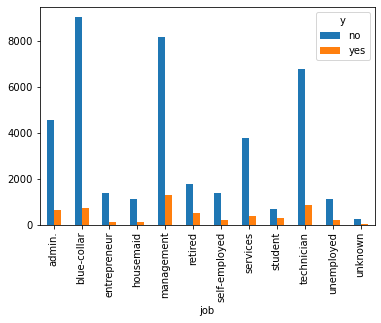

In [265]:
plt.figure(figsize=(15,5))
sns.countplot(x="job",data=df,palette="hls")
pd.crosstab(df.job,df.y).plot(kind="bar")

<AxesSubplot:xlabel='marital'>

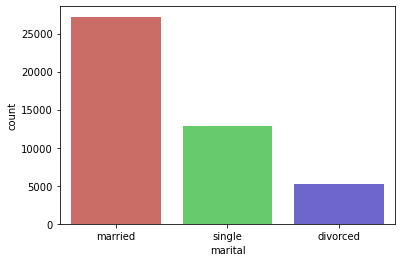

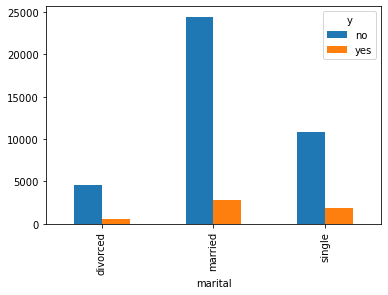

In [266]:
sns.countplot(x="marital",data=df,palette="hls")
pd.crosstab(df.marital,df.y).plot(kind="bar")

<AxesSubplot:xlabel='default'>

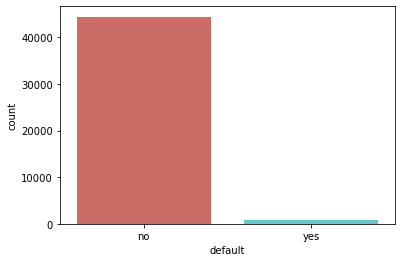

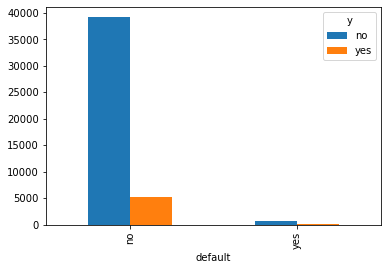

In [267]:
sns.countplot(x="default",data=df,palette="hls")
pd.crosstab(df.default,df.y).plot(kind="bar")

<AxesSubplot:xlabel='housing'>

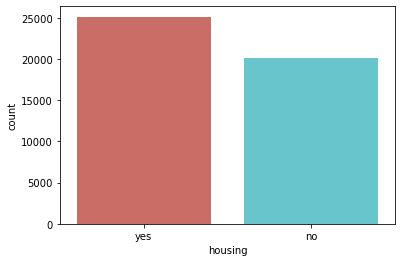

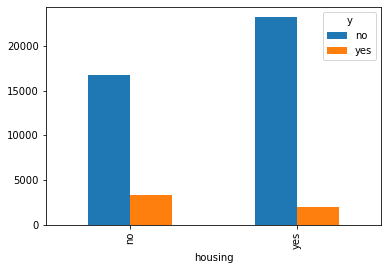

In [268]:
sns.countplot(x="housing",data=df,palette="hls")
pd.crosstab(df.housing,df.y).plot(kind="bar")

<AxesSubplot:xlabel='loan'>

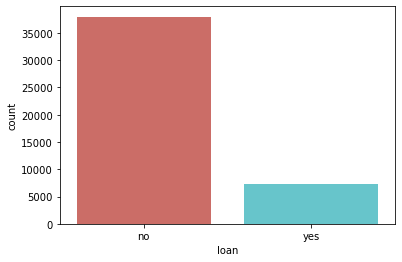

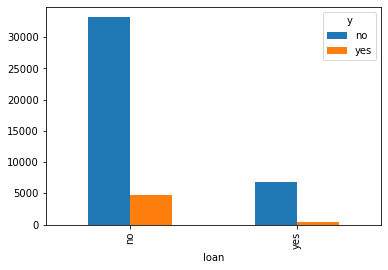

In [269]:
sns.countplot(x="loan",data=df,palette="hls")
pd.crosstab(df.loan,df.y).plot(kind="bar")

<AxesSubplot:xlabel='contact'>

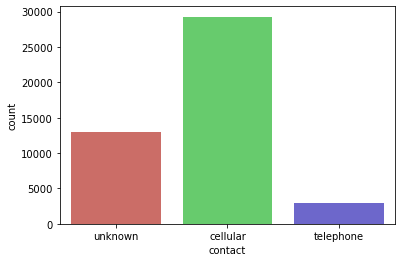

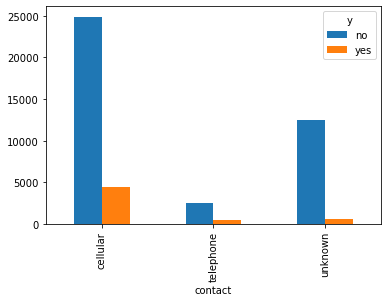

In [270]:
sns.countplot(x="contact",data=df,palette="hls")
pd.crosstab(df.contact,df.y).plot(kind="bar")

<AxesSubplot:xlabel='month'>

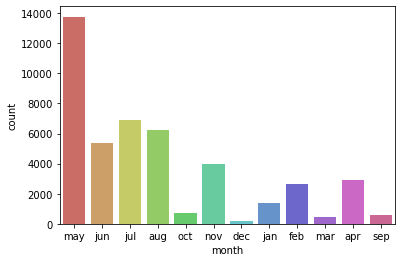

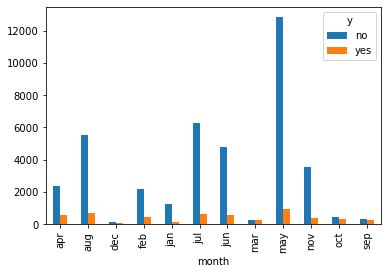

In [271]:
sns.countplot(x="month",data=df,palette="hls")
pd.crosstab(df.month,df.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

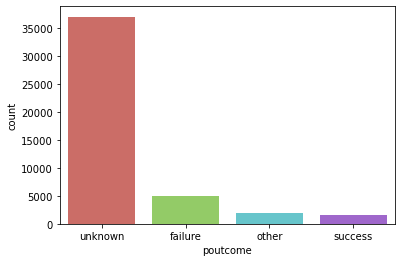

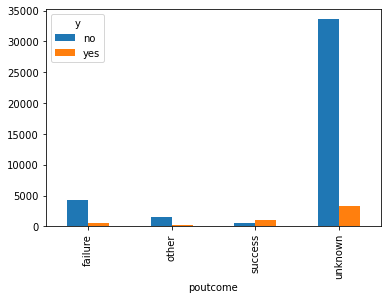

In [272]:
sns.countplot(x="poutcome",data=df,palette="hls")
pd.crosstab(df.poutcome,df.y).plot(kind="bar")

# LogisticRegression

In [273]:
#We need to convert columns;-- jobs,marital,education,default,housing,loan,contact,month,poutime,y to float 
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [274]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [275]:
df.loc[df['job']=='blue-collar','job']=0
df.loc[df['job']=='management','job']=1
df.loc[df['job']=='admin.','job']=2
df.loc[df['job']=='services','job']=3
df.loc[df['job']=='retired','job']=4
df.loc[df['job']=='self-employed','job']=5
df.loc[df['job']=='unemployed','job']=6
df.loc[df['job']=='housemaid','job']=7
df.loc[df['job']=='student','job']=8
df.loc[df['job']=='unknown','job']=9
df.loc[df['job']=='technician','job']=10
df.loc[df['job']=='entrepreneur','job']=11


In [276]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [277]:
df.loc[df['marital'] == 'married','marital'] = 0
df.loc[df['marital'] == 'single','marital'] = 1
df.loc[df['marital'] == 'divorced','marital'] = 2


In [278]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [279]:
df.loc[df['education']=='secondary','education']=0
df.loc[df['education']=='tertiary','education']=1
df.loc[df['education']=='primary','education']=2
df.loc[df['education']=='unknown','education']=3

# df.loc[df['education']=='secondary','education']=0
# df.loc[df['education']=='tertiary','education']=1
# df.loc[df['education']=='primary','education']=2
# df.loc[df['education']=='unknown','education']=3

In [280]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [281]:
df.loc[df['default']=='no','default']= 0
df.loc[df['default']=='yes','default']= 1

In [282]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [283]:
df.loc[df['housing']=='no','housing']= 0
df.loc[df['housing']=='yes','housing']= 1

In [284]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [285]:
df.loc[df['loan']=='no','loan']= 0
df.loc[df['loan']=='yes','loan']= 1

In [286]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [287]:
df.loc[df['month']=='jan','month']=0
df.loc[df['month']=='feb','month']=1
df.loc[df['month']=='mar','month']=2
df.loc[df['month']=='apr','month']=3
df.loc[df['month']=='may','month']=4
df.loc[df['month']=='jun','month']=5
df.loc[df['month']=='jul','month']=6
df.loc[df['month']=='aug','month']=7
df.loc[df['month']=='sep','month']=8
df.loc[df['month']=='oct','month']=9
df.loc[df['month']=='nov','month']=10
df.loc[df['month']=='dec','month']=11

In [288]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [289]:
df.loc[df['poutcome']=='unknown','poutcome']=0
df.loc[df['poutcome']=='failure','poutcome']=1
df.loc[df['poutcome']=='other','poutcome']=2
df.loc[df['poutcome']=='success','poutcome']=3

In [290]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [291]:
df.loc[df['contact']=='cellular','contact']=0
df.loc[df['contact']=='unknown','contact']=1
df.loc[df['contact']=='telephone','contact']=2

In [292]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [293]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle = True)

In [294]:
X = df.iloc[0:,:16]
Y = df.iloc[:,-1]

In [295]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,1,0,1,0,2143,1,0,1,5,4,261,1,-1,0,0
1,44,10,1,0,0,29,1,0,1,5,4,151,1,-1,0,0
2,33,11,0,0,0,2,1,1,1,5,4,76,1,-1,0,0
3,47,0,0,3,0,1506,1,0,1,5,4,92,1,-1,0,0
4,33,9,1,3,0,1,0,0,1,5,4,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,0,1,0,825,0,0,0,17,10,977,3,-1,0,0
45207,71,4,2,2,0,1729,0,0,0,17,10,456,2,-1,0,0
45208,72,4,0,0,0,5715,0,0,0,17,10,1127,5,184,3,3
45209,57,0,0,0,0,668,0,0,2,17,10,508,4,-1,0,0


In [296]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [297]:
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
#Logistic Regression and fit the model

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [298]:
classifier.coef_ # coefficients of features 

array([[-3.59760749e-02,  2.78486381e-02, -2.53425636e-02,
        -1.08251865e-02, -6.95387788e-03,  4.22022644e-05,
        -2.65827090e-01, -7.27866096e-02, -1.23735504e-01,
        -2.34832909e-02, -1.04556871e-01,  3.36574494e-03,
        -3.62013775e-01, -9.28774469e-04,  1.53847173e-01,
         2.76030631e-01]])

In [299]:
classifier.predict_proba (X_test) # Probability values 

array([[0.69448703, 0.30551297],
       [0.92779358, 0.07220642],
       [0.93585277, 0.06414723],
       ...,
       [0.95219296, 0.04780704],
       [0.87459514, 0.12540486],
       [0.8249512 , 0.1750488 ]])

In [300]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle = True)

In [301]:
classifier.predict_proba(X_test)[:,:1]

array([[0.96514147],
       [0.85305431],
       [0.74012694],
       ...,
       [0.96803963],
       [0.93215049],
       [0.8914635 ]])

In [302]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#df['job']= label_encoder.fit_transform(df['job']) 

In [303]:
classifier.predict_proba(X_test)[:,0]

array([0.96514147, 0.85305431, 0.74012694, ..., 0.96803963, 0.93215049,
       0.8914635 ])

In [304]:
classifier.predict_proba(X_test)[:,1]

array([0.03485853, 0.14694569, 0.25987306, ..., 0.03196037, 0.06784951,
       0.1085365 ])

In [305]:
y_pred = classifier.predict(X_test)

In [306]:
y_pred_df = pd.DataFrame({'actual' : Y,
                          'prob' : classifier.predict_proba(X)[:,1],
                          'predicted' : classifier.predict(X)
    
})

y_pred_df

#created dataframe with actual output and prediction

,actual,prob,predicted
0,no,0.076394,no
1,no,0.098674,no
2,no,0.110125,no
3,no,0.060549,no
4,no,0.189419,no
...,...,...,...
45206,yes,0.293331,no
45207,yes,0.039896,no
45208,yes,0.334920,no
45209,no,0.027722,no


In [307]:
y_pred_df['actual'] == y_pred_df['predicted']

0         True
1         True
2         True
3         True
4         True
         ...  
45206    False
45207    False
45208    False
45209     True
45210    False
Length: 45211, dtype: bool

In [308]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
y_pred_df

,actual,prob,predicted,correct
0,no,0.076394,no,True
1,no,0.098674,no,True
2,no,0.110125,no,True
3,no,0.060549,no,True
4,no,0.189419,no,True
...,...,...,...,...
45206,yes,0.293331,no,False
45207,yes,0.039896,no,False
45208,yes,0.334920,no,False
45209,no,0.027722,no,True


In [309]:
y_pred_df[y_pred_df['correct']==True]

,actual,prob,predicted,correct
0,no,0.076394,no,True
1,no,0.098674,no,True
2,no,0.110125,no,True
3,no,0.060549,no,True
4,no,0.189419,no,True
...,...,...,...,...
45189,no,0.235157,no,True
45194,no,0.036536,no,True
45198,no,0.084491,no,True
45200,yes,0.717552,yes,True


In [310]:
y_pred_df[y_pred_df['correct']==False]
#here we checked how many values are predicted wrongly.

,actual,prob,predicted,correct
37,no,0.945479,yes,False
43,no,0.860688,yes,False
59,no,0.952896,yes,False
129,yes,0.225558,no,False
152,no,0.982513,yes,False
...,...,...,...,...
45205,yes,0.158180,no,False
45206,yes,0.293331,no,False
45207,yes,0.039896,no,False
45208,yes,0.334920,no,False


In [311]:
y_pred_df['correct'].value_counts()

True     40126
False     5085
Name: correct, dtype: int64

In [312]:
y_pred_df['correct'].mean()

0.8875273716573401

# Confusion Matrix

In [313]:
#confusion matrix for model accuracy

In [314]:
confusion_matrix = confusion_matrix(Y_test,y_pred)  
print(confusion_matrix) 

[[11753   244]
 [ 1269   298]]


<AxesSubplot:>

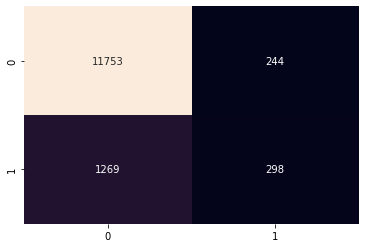

In [315]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd',cbar = False )

In [316]:
#Now we can calculate preceion accyracy F1 score sesnsitivity specificuty manual but we have command too given below

In [318]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11997
         yes       0.55      0.19      0.28      1567

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564

